## Show Version

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2021-07-20T23:28:26.114108+09:00

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [413]:
%watermark --iversions

seaborn           : 0.11.1
pandas            : 1.3.0
sklearn_evaluation: 0.5.6
joblib            : 0.16.0
mglearn           : 0.1.9
tpot              : 0.11.7
missingno         : 0.5.0
matplotlib        : 3.2.2
sklearn           : 0.0
numpy             : 1.21.1



In [51]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\park1\anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 21.1.3
   setuptools: 49.2.0.post20200714
      sklearn: 0.23.1
        numpy: 1.21.1
        scipy: 1.7.0
       Cython: 0.29.21
       pandas: 1.3.0
   matplotlib: 3.2.2
       joblib: 0.16.0
threadpoolctl: 2.1.0

Built with OpenMP: True


## Simple EDA

In [4]:
from sklearn.datasets import load_wine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

In [5]:
data = load_wine(as_frame=True)

In [6]:
df = data.frame

In [7]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

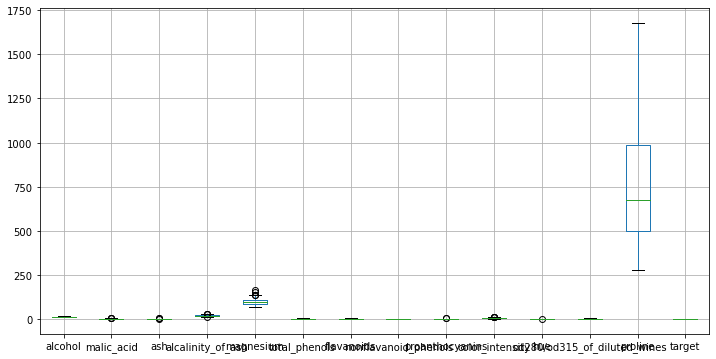

In [11]:
df.boxplot(figsize=(12,6))

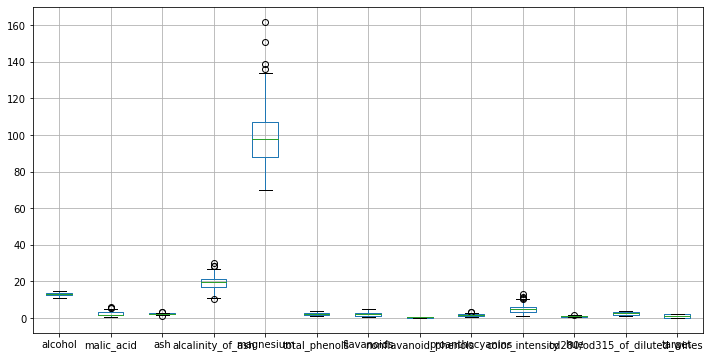

In [12]:
(df.drop(['proline'],axis=1)).boxplot(figsize=(12,6))

In [13]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

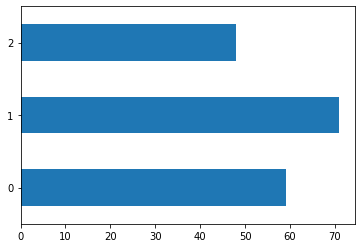

In [14]:
df.target.value_counts().sort_index().plot.barh()

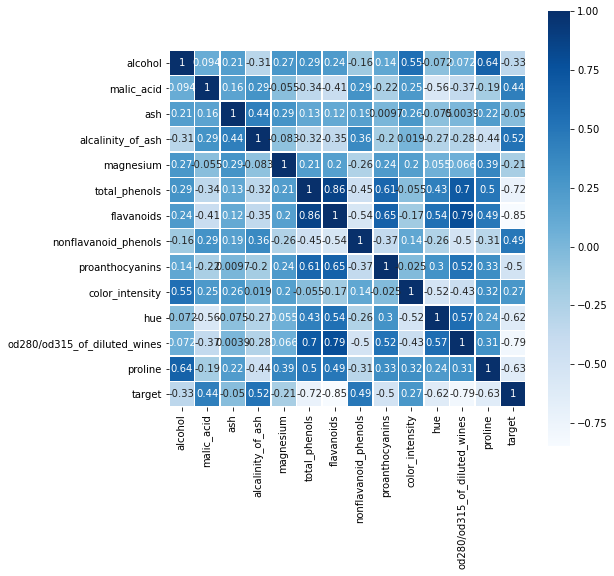

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,square=True, cmap='Blues')

#### Feature 수와 비교해서 data수가 너무적다

## model을 정하기 위한 여러 고려사항이 필요하다

### Learning curve로 살펴보기

In [17]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

import sklearn_evaluation

In [18]:
train_size, train_score, test_score = learning_curve(DecisionTreeClassifier(), df.iloc[:,:-1], df.target, cv=5)

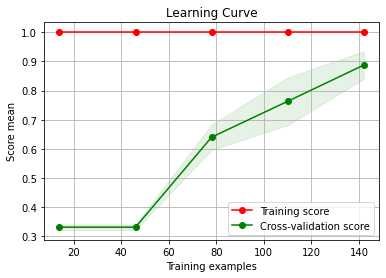

In [19]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size) ## undefitting

#### 모델이 복잡해짐에 따라서 오버피팅 발생(차원의 저주-- feature 수에 비해서 data수가 너무 적다)

In [20]:
train_size, train_score, test_score = learning_curve(MLPClassifier(), df.iloc[:,:-1], df.target, cv=5)

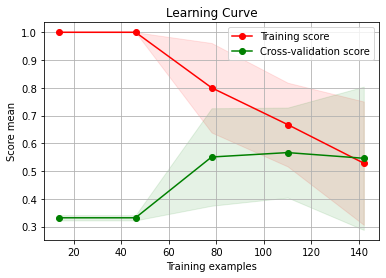

In [21]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

### 차원의 저주
- 저차원에서는 충분했던 데이터 양도 고차원이 되면 학습모델을 설명하기에 붖고해 질수 있다.
- 모델을 설명하기에 데이터 부족 ===> overfitting

### Solution
- 데이터 양
- 중요한 특징 뽑기(demensionality reduction, feature extraction, feature selection)
- 사전지식 이용 ===> regularziation

## Preprocessing

### LabelEncoding, OrdinalEncoding

In [25]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [26]:
tips = sns.load_dataset('tips')

In [27]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### 내부적으로 카테고리형 데이터로 바꿔놓으면 인코딩하기 매우 쉽다

In [28]:
tips.smoker.cat.codes ## .cat을통해 category 데이터에 적용할 수 있는 여러가지 함수가 나온다

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    0
241    0
242    1
243    1
Length: 244, dtype: int8

In [29]:
tips.day.astype('category').cat.codes ## 카테고리형으로도 변환가능하다(이후 인코딩 가능)

0      3
1      3
2      3
3      3
4      3
      ..
239    2
240    2
241    2
242    2
243    0
Length: 244, dtype: int8

In [30]:
tips.smoker.map({'No':0,'Yes':1}) ## map 함수를 통해 dict를 사용하여 인코딩 가능

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    1
241    1
242    0
243    0
Name: smoker, Length: 244, dtype: category
Categories (2, int64): [1, 0]

In [31]:
tips.day.map(lambda x : 3 if x=='Sun' else 2 if x=='Sat' else 1 if x=='Fri' else 0)

0      3
1      3
2      3
3      3
4      3
      ..
239    2
240    2
241    2
242    2
243    0
Name: day, Length: 244, dtype: category
Categories (4, int64): [0, 1, 2, 3]

- apply는 function만 사용 가능 dict 사용 불가능 ===> but DataFrame에 사용가능
- map은 pd.Series에만 사용 가능
- applymap은 dataframe에만 사용가능

### sklearn 내부함수를 사용하여 인코딩할 경우 좋은점은 inverse_transform이 가능하다는 점!!

In [32]:
le=LabelEncoder()

In [33]:
le.fit_transform(tips.day) ## 1차원 데이터를 입력으로 받는다

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [34]:
vars(le) ## 알파벳 순서대로 라벨인코딩 해준다.

{'classes_': array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)}

In [35]:
le.inverse_transform([0,1,2,3,1,1,1,]) ## 거꾸로 인코딩 가능하다.

array(['Fri', 'Sat', 'Sun', 'Thur', 'Sat', 'Sat', 'Sat'], dtype=object)

In [36]:
od = OrdinalEncoder()

In [37]:
od.fit_transform(tips[['day']]) ## 2차원 데이터를 입력으로 받는다

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [38]:
vars(od) ## 알파벳 순서대로 인코딩

{'categories': 'auto',
 'dtype': numpy.float64,
 'categories_': [array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)]}

#### label인코딩(1차원)과 ordinal인코딩(2차원)은 1차원인지 2차원으로 바꿔주는지의 차이만 있다(인코딩 순서는 알파벳 순서대로 진행한다)

### one hot encoding

In [39]:
pd.get_dummies(tips.day) ## pandas 이용법

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0


In [40]:
ohe = OneHotEncoder()

In [41]:
ohe.fit_transform(tips[['day']]).toarray() ## sklearn에서는 toarray()를 해줘야 ohe벡터가 출력!

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [42]:
tips['Thur'] = np.where(tips.day == 'Thur',1,0) ## 혹은 기본적인 문법을 사용하여 one-hot-encoding가능

In [43]:
tips['Fri'] = (tips.day =='Fri')*1

In [44]:
tips

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,0


## Missing data

In [45]:
mpg = sns.load_dataset('mpg')

In [46]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

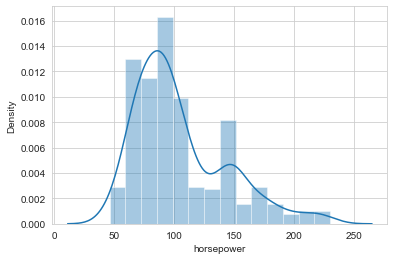

In [47]:
sns.set_style('whitegrid')
sns.distplot(mpg.horsepower)

In [48]:
mpg.horsepower.mean()

104.46938775510205

In [49]:
mpg[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


### fillna(pandas)

In [52]:
mpg.horsepower.fillna(mpg.horsepower.mean())

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

### KNNImputer

In [53]:
from sklearn.impute import KNNImputer ## nan값을 target으로 놓고 knn알고리즘을 써서 결측치 구하기

- knnimputer은 오로지 numeric변수에 대해서만 사용 가능하다.

In [60]:
int_col = mpg.columns[mpg.dtypes != object].to_list()

In [61]:
int_col

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [62]:
knn = KNNImputer()

In [73]:
idx = mpg[mpg.horsepower.isna()].index.to_list()
idx

[32, 126, 330, 336, 354, 374]

In [75]:
pd.DataFrame(knn.fit_transform(mpg[int_col])[idx])

,0,1,2,3,4,5,6
0,25.0,4.0,98.0,62.0,2046.0,19.0,71.0
1,21.0,6.0,200.0,107.6,2875.0,17.0,74.0
2,40.9,4.0,85.0,64.6,1835.0,17.3,80.0
3,23.6,4.0,140.0,112.8,2905.0,14.3,80.0
4,34.5,4.0,100.0,76.0,2320.0,15.8,81.0
5,23.0,4.0,151.0,88.2,3035.0,20.5,82.0


In [76]:
mpg[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


- 다음과 같이 나머지 col을 feature로 삼아 결측치의 값을 구해준 것을 확인하였다.

### SimpleImputer

In [77]:
from sklearn.impute import SimpleImputer

In [83]:
si = SimpleImputer(strategy='median')

In [84]:
si.fit_transform(mpg[['horsepower']])[idx] ## medialn값으로 missing data처리

array([[93.5],
       [93.5],
       [93.5],
       [93.5],
       [93.5],
       [93.5]])

#### new feature (기존 피쳐에서 새로운 피쳐를 뽑아내서 데이터의미를 더욱 풍부하게 한다) ===> domain지식이 필요===> 성능을 좌우하는 요소

### Scailing
- 알고리즘 별로 scaling 사용

In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [86]:
import mglearn

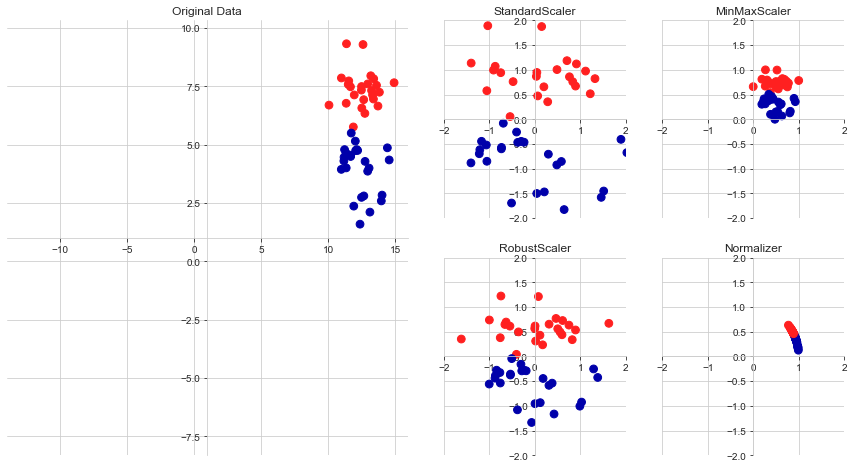

In [87]:
mglearn.plot_scaling.plot_scaling()

In [88]:
iris = sns.load_dataset('iris')    

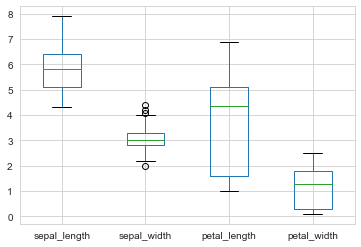

In [89]:
iris.boxplot()

In [90]:
mm = MinMaxScaler()

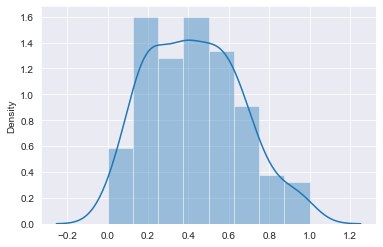

In [93]:
sns.set_style('darkgrid')
sns.distplot(mm.fit_transform(iris[['sepal_length']]).reshape(-1,))

## pipeline 
- scaling과 estimator 처리를 한번에 이어서
- 모든 features를 전처리 해준다는 단점이 있다

In [94]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
pipe = Pipeline([('roubost', RobustScaler()), ('knn', KNeighborsClassifier())]) ## 이때 사용하는 별칭은 추후 하이퍼 파라미터 튜닝때 사용된다.

In [97]:
pipe.fit(iris.iloc[:,:-1], iris.species)

Pipeline(steps=[('roubost', RobustScaler()), ('knn', KNeighborsClassifier())])

In [98]:
pipe2 = make_pipeline(RobustScaler(), KNeighborsClassifier())

In [99]:
pipe2.fit(iris.iloc[:,:-1], iris.species) ## 알아서 이름을 생성해준다(robustscaler, kneighborsclassifer)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [103]:
import joblib
import pickle

In [239]:
with open('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [241]:
with open('pipe.model' ,'rb') as f:
    pp = pickle.load(f)

In [243]:
joblib.dump(pipe2, 'pipe.model2')

['pipe.model2']

In [ ]:
joblib.load('pipe.model2')

#### Visualization pipeline

In [104]:
from sklearn import set_config
set_config(display = 'diagram')

In [107]:
pipe

Pipeline(steps=[('roubost', RobustScaler()), ('knn', KNeighborsClassifier())])

### titanic dataset(fetch_openml)

In [108]:
from sklearn.datasets import fetch_openml

In [109]:
fetch = fetch_openml('titanic', version = 1,as_frame=True)

In [110]:
df = fetch.frame

In [111]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [267]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [269]:
import missingno as msno

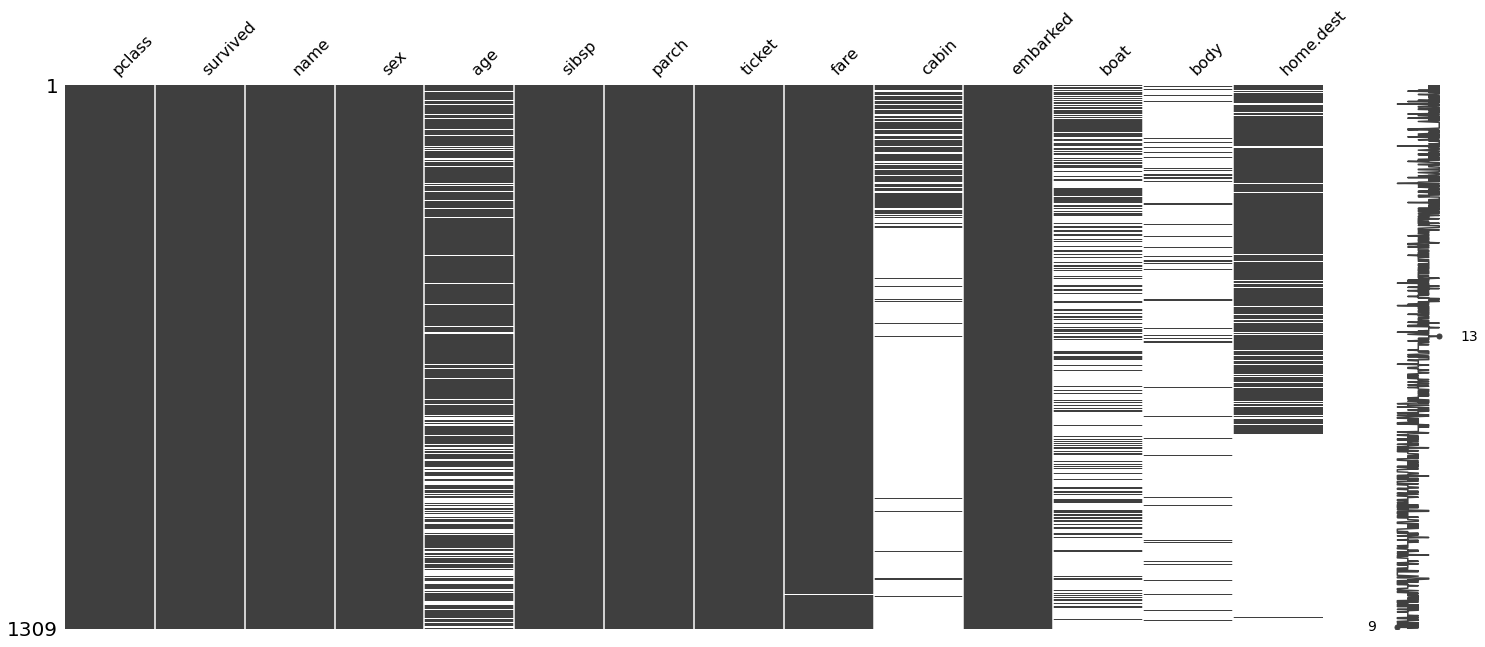

In [270]:
msno.matrix(df)

In [272]:
x = df.drop(['survived'], axis=1)
y = df.survived

In [274]:
pd.cut(df.age,[0,20])

0               NaN
1       (0.0, 20.0]
2       (0.0, 20.0]
3               NaN
4               NaN
           ...     
1304    (0.0, 20.0]
1305            NaN
1306            NaN
1307            NaN
1308            NaN
Name: age, Length: 1309, dtype: category
Categories (1, interval[int64, right]): [(0, 20]]

In [277]:
pd.qcut(df.age,[0,.2])

0                 NaN
1       (0.166, 19.0]
2       (0.166, 19.0]
3                 NaN
4                 NaN
            ...      
1304    (0.166, 19.0]
1305              NaN
1306              NaN
1307              NaN
1308              NaN
Name: age, Length: 1309, dtype: category
Categories (1, interval[float64, right]): [(0.166, 19.0]]

In [288]:
df.pclass = df.pclass.astype('category')

In [112]:
df.sex.cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8

### 각 피쳐별 pipeline 만들기(ColumnTransformer)
- pipeline에서 설정한 이름들이 나중에 hyperparameter로 적용된다

In [149]:
drop_col = df.columns[df.dtypes=='object'].to_list() ### 일단은 object col을 drop 해주고 시작(단지 pipeline의 느낌만 보기위해)

In [150]:
df.drop(drop_col, axis=1, inplace=True)

In [151]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,body
0,1.0,1,female,29.0000,0.0,0.0,211.3375,S,NaN
1,1.0,1,male,0.9167,1.0,2.0,151.5500,S,NaN
2,1.0,0,female,2.0000,1.0,2.0,151.5500,S,NaN
3,1.0,0,male,30.0000,1.0,2.0,151.5500,S,135.0
4,1.0,0,female,25.0000,1.0,2.0,151.5500,S,NaN


In [113]:
from sklearn.compose import ColumnTransformer, make_column_selector

In [179]:
numeric = Pipeline([('imputer', SimpleImputer()),('scaler', StandardScaler())]) ## 맨끝쪽에 estimator 집어넣지 않는다
cate = Pipeline([('imputer', SimpleImputer()),('encoding', OneHotEncoder())])

In [116]:
preprocessing = ColumnTransformer([('num', numeric, ['age','fare']),('cate', cate,['embarked','sex','pclass'])]) ## columtransformer를 사용하여 두개의 전처리 파이프라인 col별로 묶어주기

In [117]:
estimator = Pipeline([('preprocessing', preprocessing),('estimator', RandomForestClassifier())]) ## 최종 estimator pipeline설정

In [118]:
estimator

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cate',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('estimator', RandomForestClassifier())])

### make_column_selector의 사용

In [172]:
x = df.drop('survived', axis=1)
y = df.survived

In [170]:
make_column_selector(dtype_include='category')(x) ## dtype별 col을 뽑아준다.

['sex', 'embarked']

In [171]:
make_column_selector(dtype_include='float64')(x)

['pclass', 'age', 'sibsp', 'parch', 'fare', 'body']

In [180]:
preprocessing = ColumnTransformer([('num', numeric, make_column_selector(dtype_include='float64')(x)),('cate', cate,make_column_selector(dtype_include='category')(x))]) 

In [181]:
estimator = Pipeline([('preprocessing', preprocessing),('estimator',RandomForestClassifier())])

In [182]:
vars(estimator)

{'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['pclass', 'age', 'sibsp', 'parch', 'fare',
                                     'body']),
                                   ('cate',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('encoding',
                                                     OneHotEncoder())]),
                                    ['sex', 'embarked'])])),
  ('estimator', RandomForestClassifier())],
 'memory': None,
 'verbose': False}

In [183]:
estimator.get_params() ### hyperparameter

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['pclass', 'age', 'sibsp', 'parch', 'fare',
                                     'body']),
                                   ('cate',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('encoding',
                                                     OneHotEncoder())]),
                                    ['sex', 'embarked'])])),
  ('estimator', RandomForestClassifier())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
          

In [184]:
grid = GridSearchCV(estimator, {'preprocessing__num__imputer__strategy':['mean','median','most_frequent'],
                                'preprocessing__cate__imputer__strategy':['mean','median','most_frequent'],
                                'preprocessing__num__scaler':[StandardScaler(), MinMaxScaler(), RobustScaler()]}, cv=10)

In [185]:
grid.fit(x,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pclass',
                                                                          'age',
                                                                          'sibsp',
                                                                          'parch',
                                                                          'fare',
                                                                          'body']),
                                                                        ('cate',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('encoding',
                                                                                          OneHotEncoder())]),
                                                                         ['sex',
                                                                          'embarked'])])),
                                       ('estimator',
                                        RandomForestClassifier())]),
             param_grid={'preprocessing__cate__imputer__strategy': ['mean',
                                                                    'median',
                                                                    'most_frequent'],
                         'preprocessing__num__imputer__strategy': ['mean',
                                                                   'median',
                                                                   'most_frequent'],
                         'preprocessing__num__scaler': [StandardScaler(),
                                                        MinMaxScaler(),
                                                        RobustScaler()]})

In [191]:
grid.best_params_, grid.best_index_, grid.best_score_

({'preprocessing__cate__imputer__strategy': 'most_frequent',
  'preprocessing__num__imputer__strategy': 'most_frequent',
  'preprocessing__num__scaler': StandardScaler()},
 24,
 0.7578038755137991)

In [189]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
mean_fit_time,0.017927,0.018868,0.025989,0.017592,0.017481,0.02264,0.020513,0.019418,0.021278,0.020489,...,0.022668,0.493126,0.497011,0.481246,0.46622,0.460415,0.491849,0.453766,0.450883,0.489179
std_fit_time,0.002603,0.003193,0.00289,0.004165,0.00385,0.001848,0.001196,0.002906,0.003924,0.002686,...,0.001546,0.005573,0.031993,0.021612,0.021047,0.022583,0.020872,0.036216,0.057573,0.007969
mean_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.036568,0.036013,0.036952,0.034402,0.034303,0.035426,0.034555,0.031863,0.035599
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002886,0.001614,0.00271,0.001645,0.002746,0.003097,0.007611,0.007534,0.001733
param_preprocessing__cate__imputer__strategy,mean,mean,mean,mean,mean,mean,mean,mean,mean,median,...,median,most_frequent,most_frequent,most_frequent,most_frequent,most_frequent,most_frequent,most_frequent,most_frequent,most_frequent
param_preprocessing__num__imputer__strategy,mean,mean,mean,median,median,median,most_frequent,most_frequent,most_frequent,mean,...,most_frequent,mean,mean,mean,median,median,median,most_frequent,most_frequent,most_frequent
param_preprocessing__num__scaler,StandardScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),...,RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler()
params,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'me...,...,{'preprocessing__cate__imputer__strategy': 'me...,{'preprocessing__cate__imputer__strategy': 'mo...,{'preprocessing__cate__imputer__strategy': 'mo...,{'preprocessing__cate__imputer__strategy': 'mo...,{'preprocessing__cate__imputer__strategy': 'mo...,{'preprocessing__cate__imputer__strategy': 'mo...,{'preprocessing__cate__imputer__strategy': 'mo...,{'preprocessing__cate__imputer__strategy': 'mo...,{'preprocessing__cate__imputer__strategy': 'mo...,{'preprocessing__cate__imputer__strategy': 'mo...
split0_test_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.709924,0.694656,0.709924,0.687023,0.717557,0.709924,0.70229,0.694656,0.717557
split1_test_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.778626,0.763359,0.755725,0.78626,0.801527,0.755725,0.801527,0.748092,0.740458


## GridSearchCV(Hyper Parameter Tuning)

In [318]:
knn = KNeighborsClassifier()

In [320]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [159]:
from sklearn.model_selection import GridSearchCV

In [341]:
grid = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':range(2,5), 'leaf_size':[10,20,30,40]} ,cv=10)

In [342]:
grid.fit(iris.iloc[:,:-1], iris.species)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': range(2, 5)})

In [343]:
grid.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=3)

In [344]:
grid.best_params_

{'leaf_size': 10, 'n_neighbors': 3}

In [345]:
grid.best_score_

0.9666666666666666

In [346]:
pd.DataFrame(grid.cv_results_).T ## 그리드별 결과를 살펴볼 수 있다

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.001953,0.0016,0.001404,0.001501,0.0013,0.001596,0.001529,0.001502,0.001306,0.001404,0.001501,0.001199
std_fit_time,0.000564,0.00049,0.000496,0.000502,0.000455,0.000487,0.000481,0.000503,0.000467,0.000493,0.000498,0.000402
mean_score_time,0.002154,0.002,0.001596,0.001798,0.0016,0.001505,0.001369,0.001598,0.001597,0.001596,0.001399,0.001699
std_score_time,0.000552,0.00044,0.000487,0.000399,0.00049,0.000497,0.000459,0.000489,0.000485,0.000488,0.000491,0.000459
param_leaf_size,10,10,10,20,20,20,30,30,30,40,40,40
param_n_neighbors,2,3,4,2,3,4,2,3,4,2,3,4
params,"{'leaf_size': 10, 'n_neighbors': 2}","{'leaf_size': 10, 'n_neighbors': 3}","{'leaf_size': 10, 'n_neighbors': 4}","{'leaf_size': 20, 'n_neighbors': 2}","{'leaf_size': 20, 'n_neighbors': 3}","{'leaf_size': 20, 'n_neighbors': 4}","{'leaf_size': 30, 'n_neighbors': 2}","{'leaf_size': 30, 'n_neighbors': 3}","{'leaf_size': 30, 'n_neighbors': 4}","{'leaf_size': 40, 'n_neighbors': 2}","{'leaf_size': 40, 'n_neighbors': 3}","{'leaf_size': 40, 'n_neighbors': 4}"
split0_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
split1_test_score,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
split2_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [347]:
grid.best_index_

1

## pipeline과 gridsearchcv의 연동

In [351]:
pipe = Pipeline([('scaler',StandardScaler() ),('clf', KNeighborsClassifier())]) ## scaler에서는 가짜 parameter를 하나 설정 해준다

In [352]:
pipe.get_params() ## hyperparameter의 이름이 바뀌기 때문에 get_params를 사용해서 한번 확인해주는것이 좋다.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('clf', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'clf': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': None,
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform'}

In [359]:
grid = GridSearchCV(pipe, {'scaler':[RobustScaler(),MinMaxScaler(),StandardScaler()],
                           'clf__n_neighbors':range(2,20)}, cv=10) ## 만들어준 이름으로 hyperparameter가 생성된다.

In [360]:
grid.fit(iris.iloc[:,:-1], iris.species)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': range(2, 20),
                         'scaler': [RobustScaler(), MinMaxScaler(),
                                    StandardScaler()]})

In [361]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
mean_fit_time,0.004097,0.002304,0.0025,0.0032,0.0023,0.002401,0.002799,0.002293,0.002505,0.003304,...,0.0026,0.003,0.0021,0.0025,0.0031,0.0023,0.002402,0.003301,0.0022,0.002404
std_fit_time,0.000943,0.000464,0.000501,0.0004,0.000458,0.00049,0.0004,0.000455,0.000505,0.000463,...,0.00049,0.000447,0.0003,0.0005,0.0003,0.000458,0.000489,0.000459,0.0004,0.000486
mean_score_time,0.002401,0.001898,0.001697,0.001703,0.0019,0.0018,0.001901,0.001807,0.001801,0.001596,...,0.0017,0.0019,0.0017,0.0017,0.001901,0.0017,0.001698,0.0017,0.0018,0.001699
std_score_time,0.000485,0.000529,0.000457,0.000463,0.000299,0.000398,0.000299,0.000403,0.000398,0.000485,...,0.000458,0.0003,0.000458,0.000458,0.0003,0.00064,0.000457,0.000458,0.0004,0.000458
param_clf__n_neighbors,2,2,2,3,3,3,4,4,4,5,...,16,17,17,17,18,18,18,19,19,19
param_scaler,RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),...,StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler()
params,"{'clf__n_neighbors': 2, 'scaler': RobustScaler()}","{'clf__n_neighbors': 2, 'scaler': MinMaxScaler()}","{'clf__n_neighbors': 2, 'scaler': StandardScal...","{'clf__n_neighbors': 3, 'scaler': RobustScaler()}","{'clf__n_neighbors': 3, 'scaler': MinMaxScaler()}","{'clf__n_neighbors': 3, 'scaler': StandardScal...","{'clf__n_neighbors': 4, 'scaler': RobustScaler()}","{'clf__n_neighbors': 4, 'scaler': MinMaxScaler()}","{'clf__n_neighbors': 4, 'scaler': StandardScal...","{'clf__n_neighbors': 5, 'scaler': RobustScaler()}",...,"{'clf__n_neighbors': 16, 'scaler': StandardSca...","{'clf__n_neighbors': 17, 'scaler': RobustScale...","{'clf__n_neighbors': 17, 'scaler': MinMaxScale...","{'clf__n_neighbors': 17, 'scaler': StandardSca...","{'clf__n_neighbors': 18, 'scaler': RobustScale...","{'clf__n_neighbors': 18, 'scaler': MinMaxScale...","{'clf__n_neighbors': 18, 'scaler': StandardSca...","{'clf__n_neighbors': 19, 'scaler': RobustScale...","{'clf__n_neighbors': 19, 'scaler': MinMaxScale...","{'clf__n_neighbors': 19, 'scaler': StandardSca..."
split0_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.866667,1.0,0.866667,0.866667,1.0,1.0,0.866667,1.0,0.933333
split1_test_score,0.866667,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
split2_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.933333,1.0,1.0,0.933333,1.0,1.0


In [362]:
grid.best_params_

{'clf__n_neighbors': 8, 'scaler': StandardScaler()}

In [365]:
grid.best_index_, grid.best_score_

(20, 0.9666666666666668)

#### Estimator도 추가해주기

In [367]:
grid = GridSearchCV(pipe, [{'clf':[KNeighborsClassifier()],
                            'clf__n_neighbors':range(2,10)},
                           {'clf':[RandomForestClassifier()],
                             'clf__n_estimators':range(100,501,100)}],   cv=10) ## 만들어준 이름으로 hyperparameter가 생성된다.(list를 통해 estimator 별 parameter를 지정해준다)

In [368]:
grid.fit(iris.iloc[:,:-1], iris.species)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid=[{'clf': [KNeighborsClassifier(n_neighbors=8)],
                          'clf__n_neighbors': range(2, 10)},
                         {'clf': [RandomForestClassifier()],
                          'clf__n_estimators': range(100, 501, 100)}])

In [369]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
mean_fit_time,0.003811,0.0027,0.002703,0.002499,0.002599,0.002702,0.002498,0.002296,0.101913,0.192288,0.29855,0.393025,0.491565
std_fit_time,0.001795,0.000457,0.000462,0.000501,0.000488,0.000462,0.000503,0.000453,0.003822,0.007814,0.012734,0.012966,0.015213
mean_score_time,0.002499,0.001495,0.001602,0.0019,0.001597,0.001896,0.001803,0.001706,0.007605,0.012807,0.019301,0.025094,0.030898
std_score_time,0.000802,0.000504,0.00049,0.000302,0.000487,0.000535,0.0006,0.000454,0.00129,0.000598,0.000634,0.001214,0.001384
param_clf,KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=8),KNeighborsClassifier(n_neighbors=8),RandomForestClassifier(),RandomForestClassifier(),RandomForestClassifier(),RandomForestClassifier(),RandomForestClassifier()
param_clf__n_neighbors,2,3,4,5,6,7,8,9,NaN,NaN,NaN,NaN,NaN
param_clf__n_estimators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,200,300,400,500
params,"{'clf': KNeighborsClassifier(n_neighbors=8), '...","{'clf': KNeighborsClassifier(n_neighbors=8), '...","{'clf': KNeighborsClassifier(n_neighbors=8), '...","{'clf': KNeighborsClassifier(n_neighbors=8), '...","{'clf': KNeighborsClassifier(n_neighbors=8), '...","{'clf': KNeighborsClassifier(n_neighbors=8), '...","{'clf': KNeighborsClassifier(n_neighbors=8), '...","{'clf': KNeighborsClassifier(n_neighbors=8), '...","{'clf': RandomForestClassifier(), 'clf__n_esti...","{'clf': RandomForestClassifier(), 'clf__n_esti...","{'clf': RandomForestClassifier(), 'clf__n_esti...","{'clf': RandomForestClassifier(), 'clf__n_esti...","{'clf': RandomForestClassifier(), 'clf__n_esti..."
split0_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
split1_test_score,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333


In [370]:
grid.best_params_, grid.best_index_, grid.best_score_

({'clf': KNeighborsClassifier(n_neighbors=8), 'clf__n_neighbors': 8},
 6,
 0.9666666666666668)

#### gridsearch는 단지 파라미터를 찾는것이고 이를 이용해  최적의 모델을  따로 만들어줘야한다

In [405]:
grid.set_params

<bound method BaseEstimator.set_params of GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid=[{'clf': [KNeighborsClassifier(n_neighbors=8)],
                          'clf__n_neighbors': range(2, 10)},
                         {'clf': [RandomForestClassifier()],
                          'clf__n_estimators': range(100, 501, 100)}])>

#### model save

In [373]:
import joblib

In [372]:
joblib.dump(grid, 'best_grid.pkl')

['best_grid.pkl']

In [374]:
aa = joblib.load('best_grid.pkl')

In [375]:
aa

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid=[{'clf': [KNeighborsClassifier(n_neighbors=8)],
                          'clf__n_neighbors': range(2, 10)},
                         {'clf': [RandomForestClassifier()],
                          'clf__n_estimators': range(100, 501, 100)}])

### TPOT

In [378]:
import tpot ## automl의 일종

In [381]:
from tpot import TPOTClassifier ## 유전자 알고리즘을 활용해서 AI기반의 최적화한 알고리즘

In [382]:
tp = TPOTClassifier(generations=20, population_size=20)

In [384]:
tp.fit(iris.iloc[:,:-1], iris.species) ## 알아서 전처리 및 알고리즘을 선택해준다(최적의)

TPOTClassifier(generations=20, population_size=20)

In [385]:
tp.export('tp.py')

In [388]:
tp.get_params()

{'config_dict': None,
 'crossover_rate': 0.1,
 'cv': 5,
 'disable_update_check': False,
 'early_stop': None,
 'generations': 20,
 'log_file': None,
 'max_eval_time_mins': 5,
 'max_time_mins': None,
 'memory': None,
 'mutation_rate': 0.9,
 'n_jobs': 1,
 'offspring_size': None,
 'periodic_checkpoint_folder': None,
 'population_size': 20,
 'random_state': None,
 'scoring': None,
 'subsample': 1.0,
 'template': None,
 'use_dask': False,
 'verbosity': 0,
 'warm_start': False}